Author: Shaw Rick\
Email: ziashariq68@gmail.com\
Date: Oct 13, 2023

# Project: *Analyzing Web Page Views:*

## Analyzing Web Page Views with Time Series Visualizations

This project focuses on analyzing web page views using time series visualizations to gain valuable insights into website traffic patterns. The objective is to leverage the power of time series analysis techniques to manipulate and visualize the data effectively.

### Purpose of the Project
The purpose of this project is twofold: 

1. **Time Series Analysis:** Apply common techniques used in time series analysis to understand the patterns, trends, and seasonality in web page views. By analyzing the historical data, we aim to uncover valuable insights into the behavior and performance of the website.

2. **Visualizations for Presentation:** Utilize the pandas and matplotlib libraries in Python to create interactive and fully customizable graphs. The goal is to produce visually appealing and informative visualizations that are ready for presentation and communication of the findings.

### Key Features and Tools
This project includes the following key features and tools:

- **Pandas:** Perform data manipulation and preprocessing tasks on the time series data.
- **Matplotlib:** Create comprehensive and interactive visualizations, including line plots, bar plots, and Box Plot time series visualizations.
- **Jupyter Notebook:** Utilize the Jupyter Notebook environment for data exploration, analysis, and visualization, ensuring an interactive and reproducible workflow.
- **Python Libraries:** Leverage various Python libraries for time series analysis, visualization, and statistical modeling to enhance the depth of analysis.

### Project Workflow
The project will follow an iterative workflow, encompassing the following steps:

1. Data collection and preprocessing: Extract the web page views data from "Free Code Camp" and perform necessary data cleaning and formatting tasks.
2. Time series visualization: Utilize matplotlib to create insightful visualizations, such as line plots, Bar plot, and Box plot.
3. Trend and seasonality analysis: Apply time series analysis techniques to identify trends, seasonality patterns, and anomalies in web page views.
4. Presentation-ready visualizations: Customize and enhance the visualizations for effective communication of the insights.

The project repository contains the Jupyter Notebook, which provides a detailed walkthrough of the analysis, code, and visualizations.

### Conclusion
By leveraging time series visualizations, this project aims to provide a comprehensive analysis of web page views, uncovering valuable insights into website traffic patterns. The project's findings and visualizations will facilitate data-driven decision-making and contribute to optimizing website performance and user engagement.

For further details, please refer to the project repository.

[https://github.com/Mshariq11/Open-Projects/]

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Import data 

In [14]:
pg_views = pd.read_csv("fcc-forum-pageviews.csv")
pg_views["date"] = pd.to_datetime(pg_views["date"])
pg_views = pg_views.set_index('date')

In [16]:
pg_views

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


### Clean Data

In [9]:
pg_views = pg_views.loc[(pg_views['value'] >= pg_views['value'].quantile(0.025)) & (pg_views['value'] <= pg_views['value'].quantile(0.975))]
pg_views

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Line Plot

<Axes: title={'center': 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

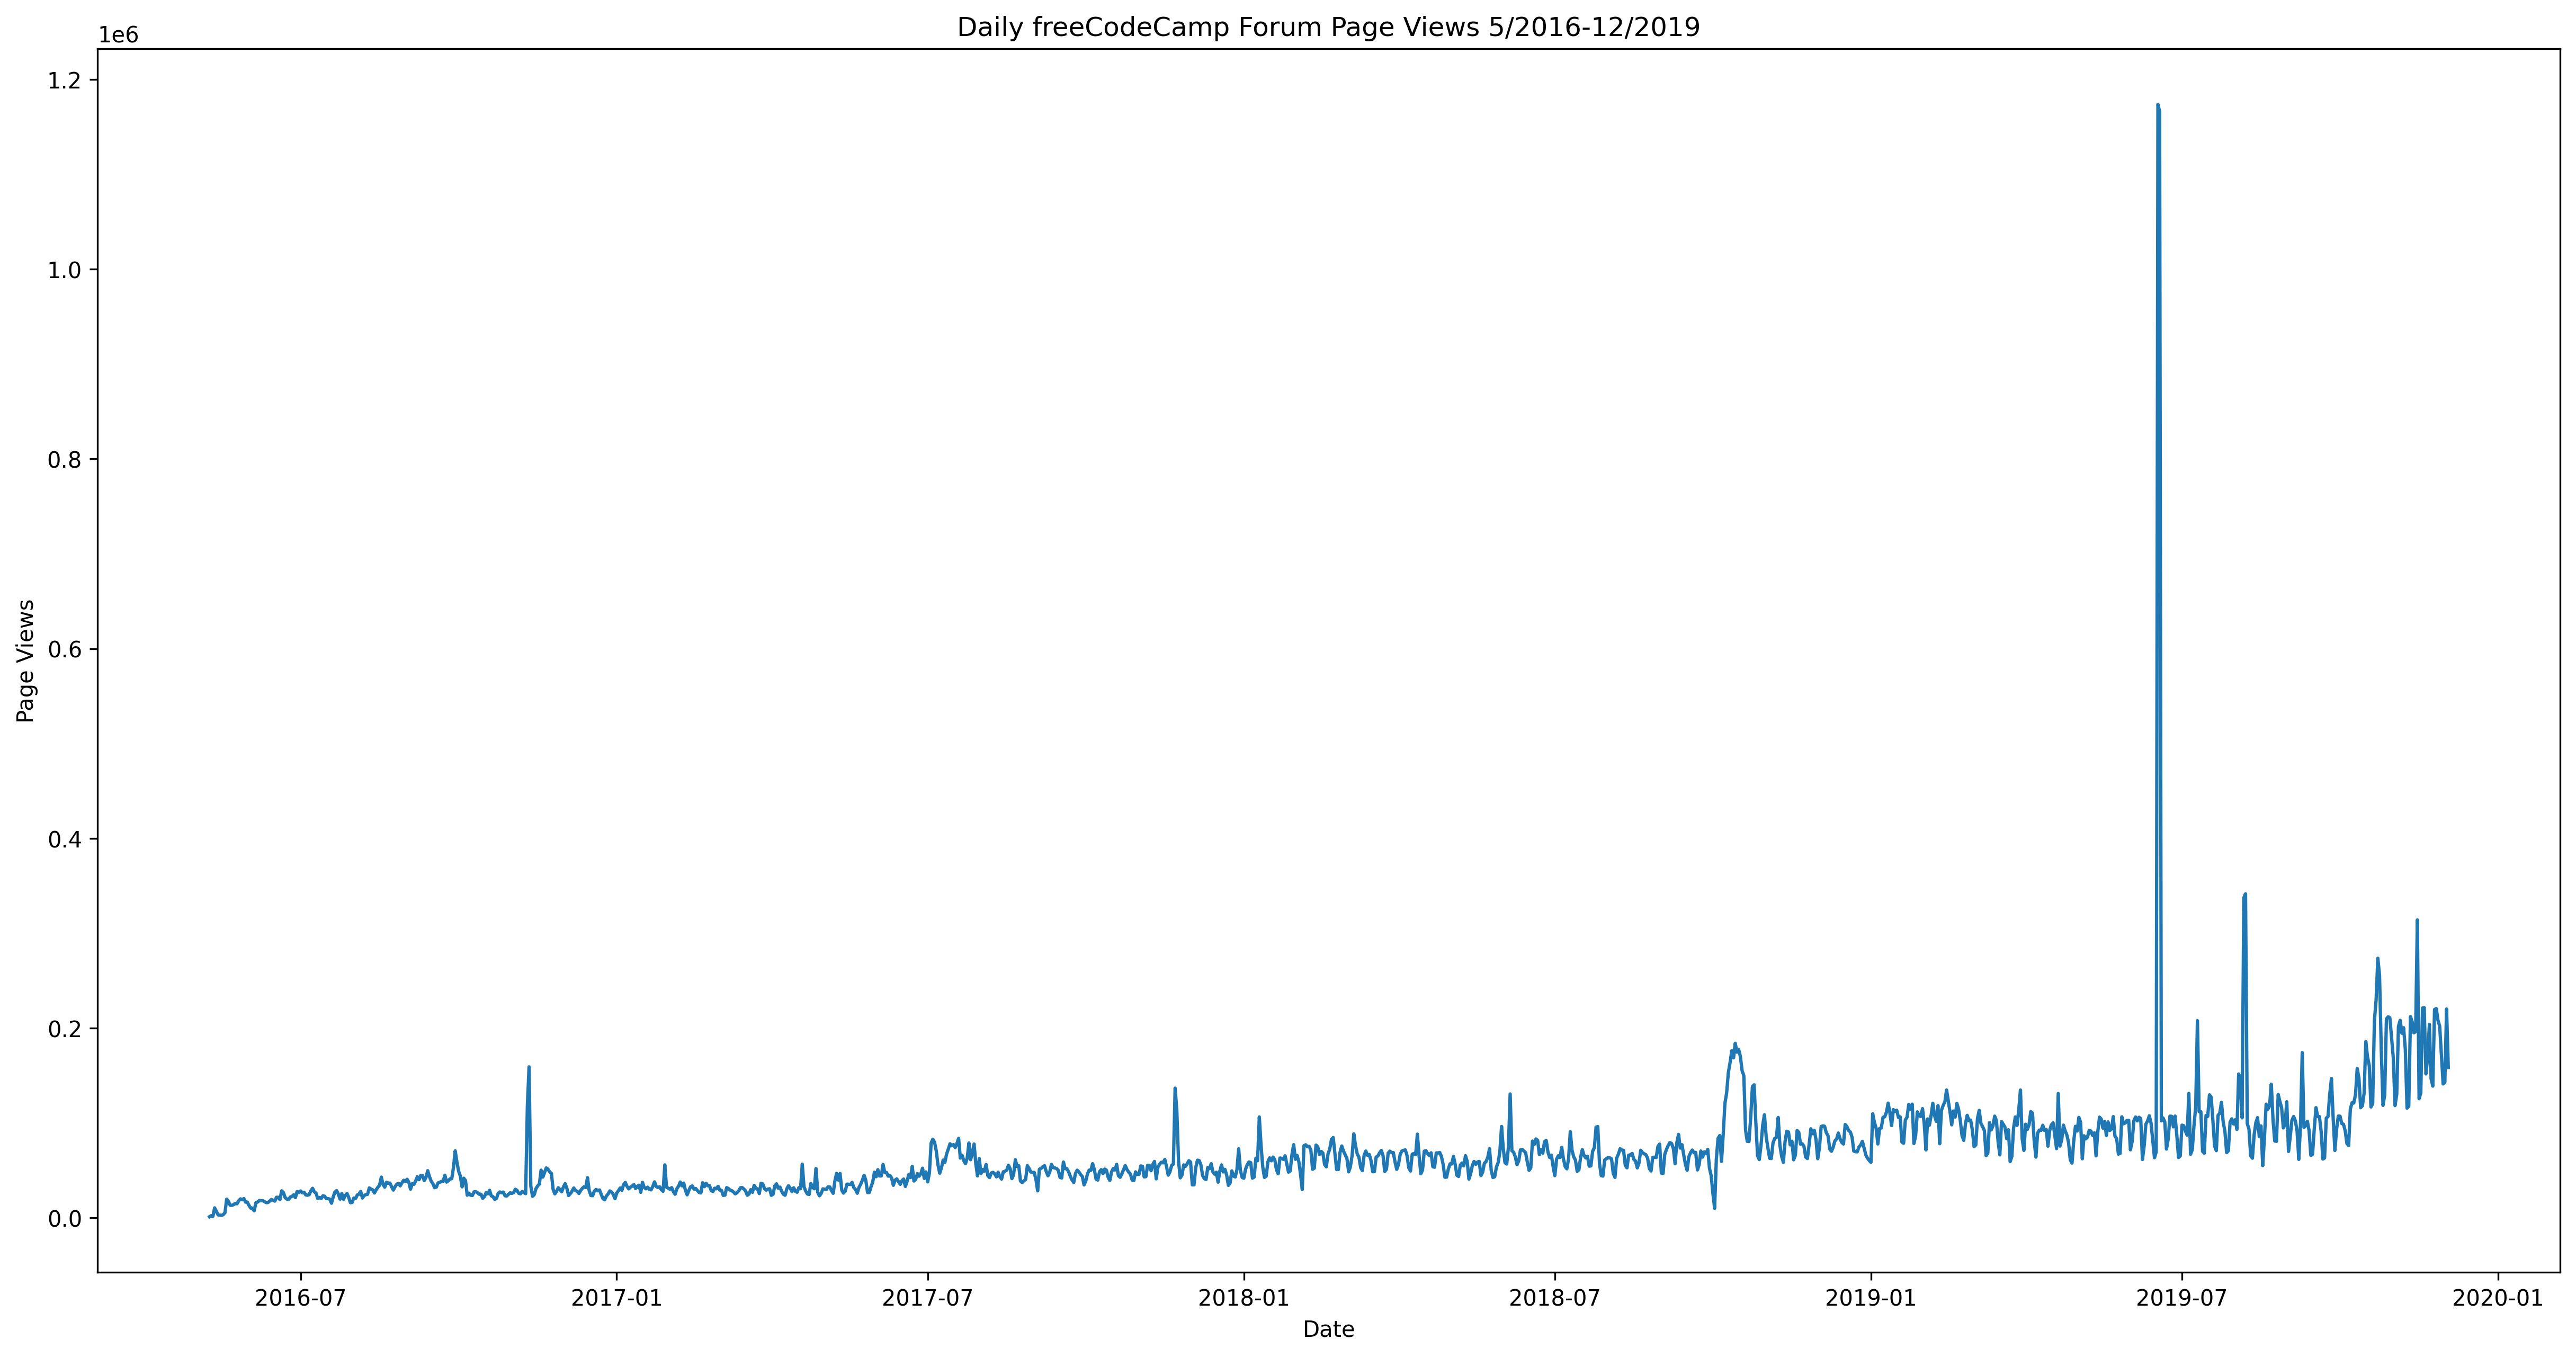

In [25]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
sns.lineplot(data=pg_views, legend=False)

# Save image
#fig.savefig('line_plot.png')

### Bar Plot

[Text(0, 0, '2016'),
 Text(1, 0, '2017'),
 Text(2, 0, '2018'),
 Text(3, 0, '2019')]

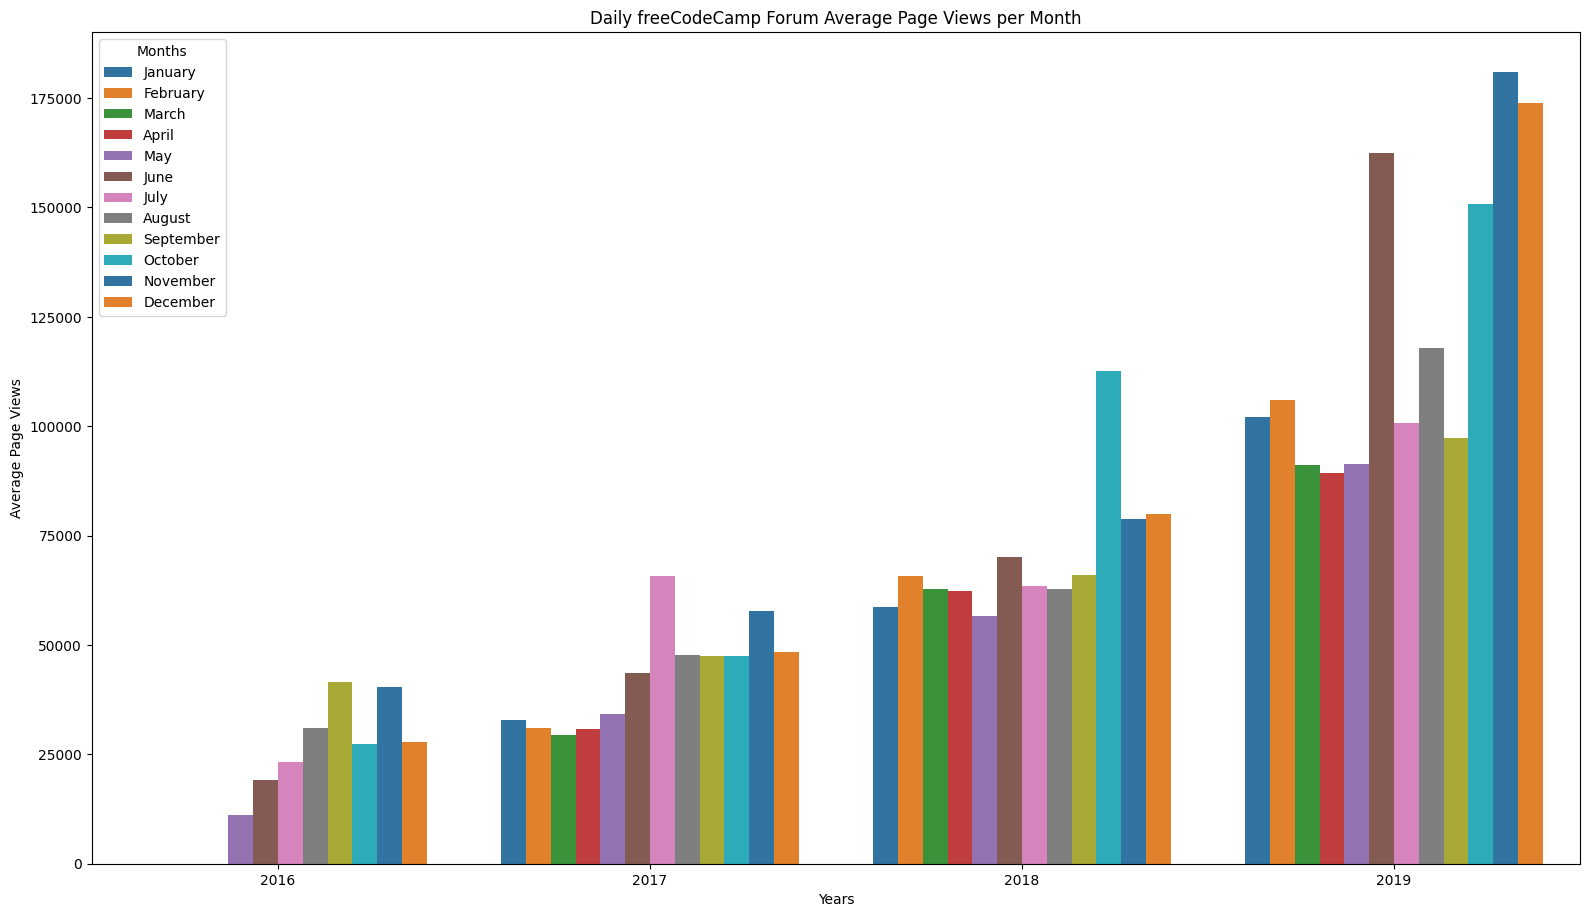

In [17]:
# Copy and modify data for monthly bar plot
pg_bar = pg_views.copy()
pg_bar["Years"] = pg_bar.index.year
pg_bar["Months"] = pg_bar.index.month_name()
pg_bar = pd.DataFrame(pg_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
pg_bar = pg_bar.rename(columns={"value": "Average Page Views"})
pg_bar = pg_bar.reset_index()
missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

pg_bar = pd.concat([pd.DataFrame(missing_data), pg_bar])

# Draw bar plot
fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

chart = sns.barplot(data=pg_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='center')

### Box Plot

Text(0, 0.5, 'Page Views')

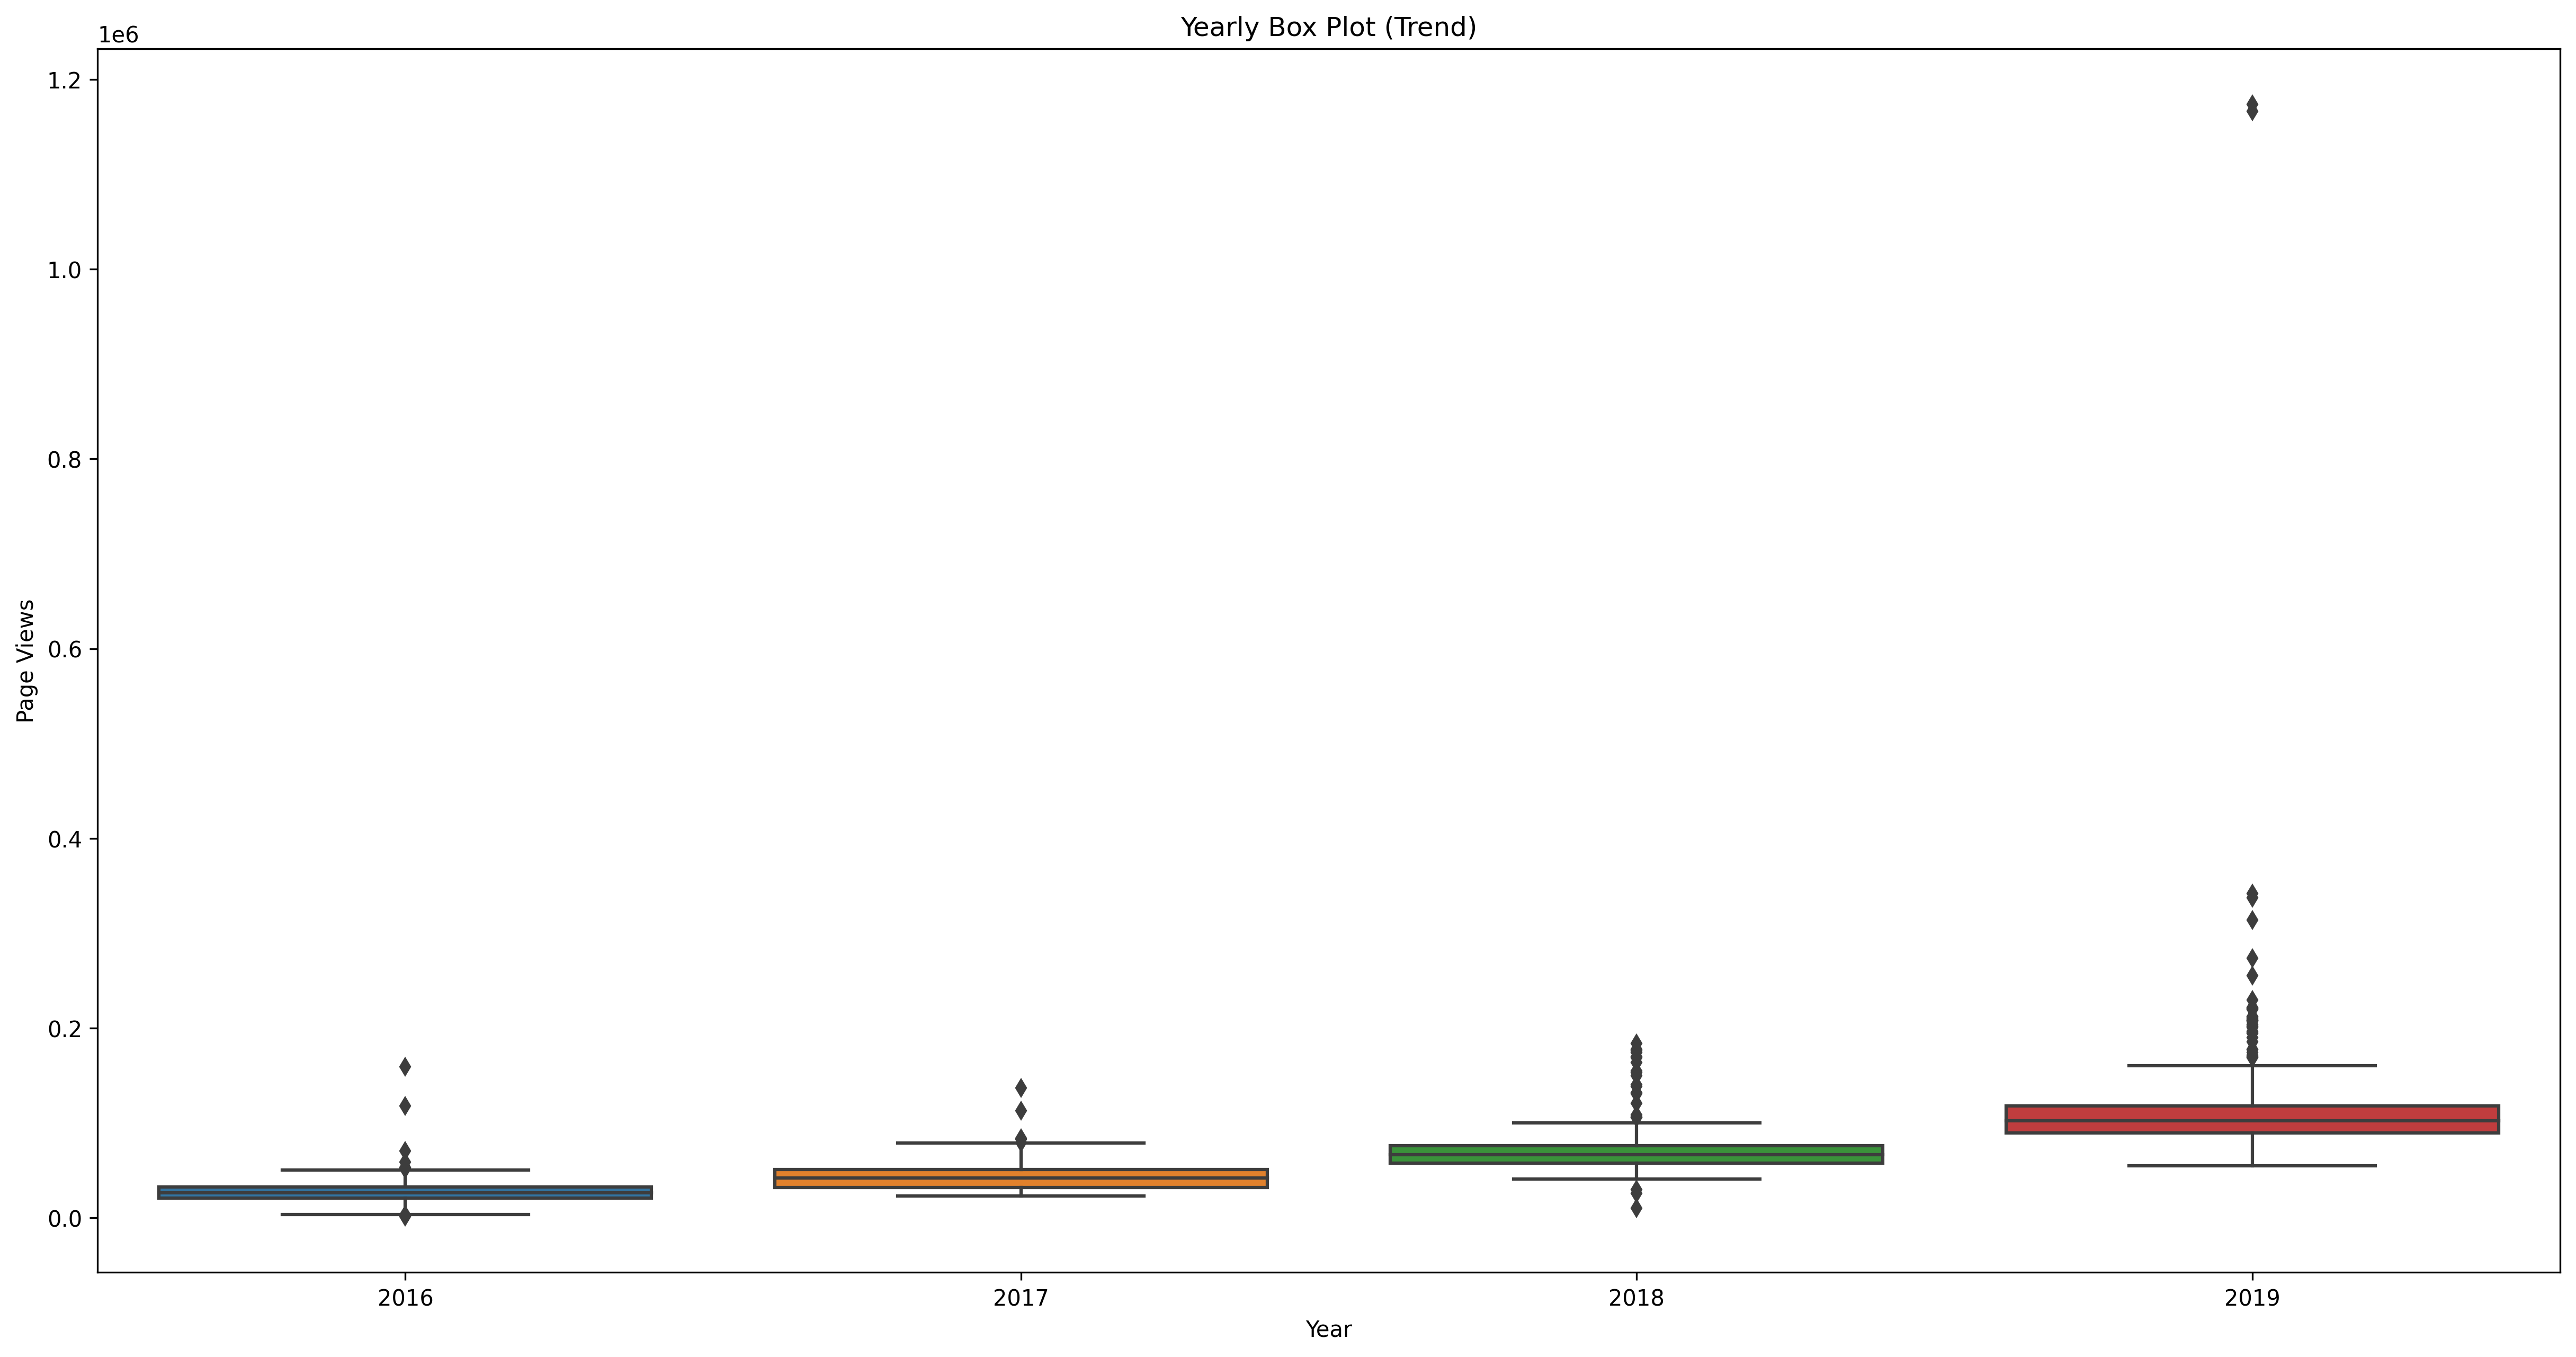

In [24]:
# Copy and modify data for Box Plot
pg_box = pg_views.copy()
pg_box.reset_index(inplace=True)
pg_box['year'] = [d.year for d in pg_box.date]

fig, axes = plt.subplots(figsize=(20, 10), dpi=300)
    
# Yearly boxplot
sns.boxplot(data=pg_box, x="year", y="value", ax=axes)
axes.set_title("Yearly Box Plot (Trend)")
axes.set_xlabel("Year")
axes.set_ylabel("Page Views")

Text(0, 0.5, 'Page Views')

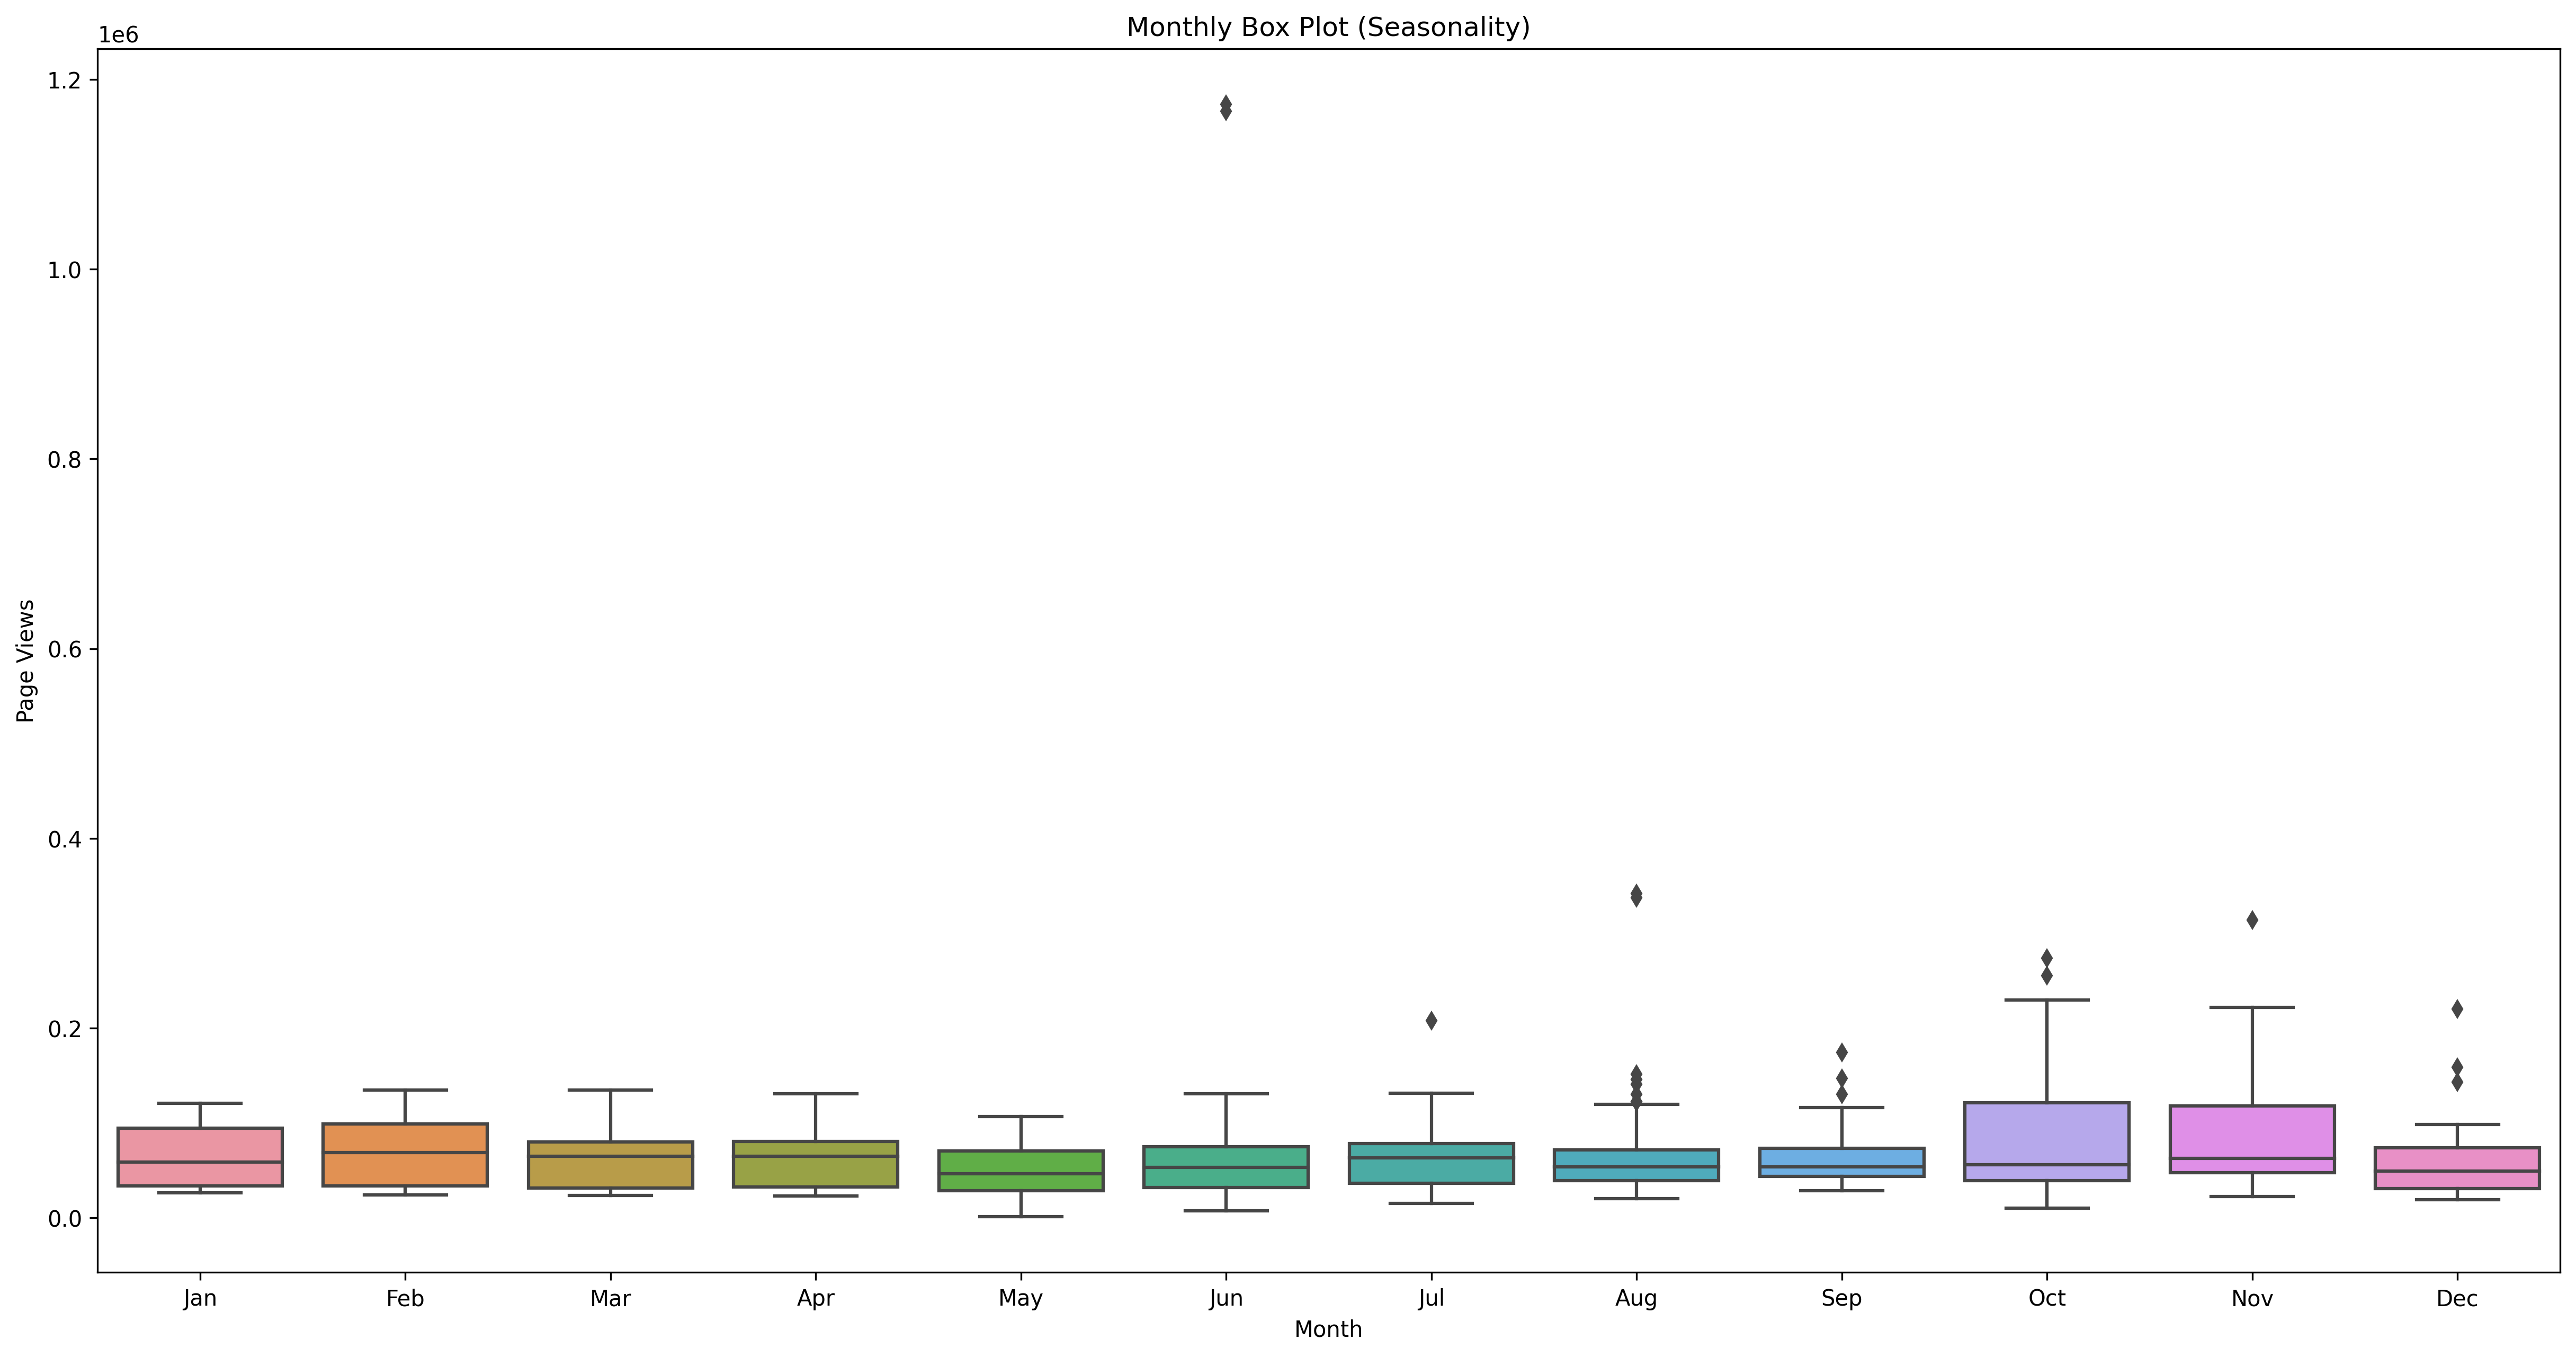

In [23]:
# Copy and modify data for Box Plot
pg_box = pg_views.copy()
pg_box.reset_index(inplace=True)
pg_box['month'] = [d.strftime('%b') for d in pg_box.date]

fig, axes = plt.subplots(figsize=(20, 10), dpi=300)

# Monthly boxplot
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=pg_box, x="month", y="value", order=month_order, ax=axes)
axes.set_title("Monthly Box Plot (Seasonality)")
axes.set_xlabel("Month")
axes.set_ylabel("Page Views")